In [12]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd


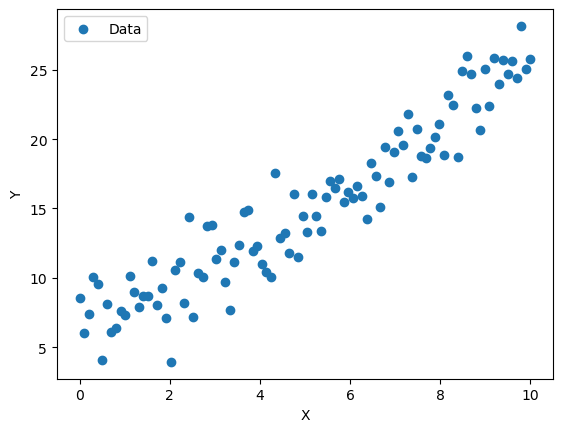

In [18]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2.0
true_intercept = 5.0
y = true_slope * X + true_intercept + np.random.normal(scale=2.0, size=len(X))
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MAP estimate:  {'slope': array(1.94171565), 'intercept': array(5.40887439)}


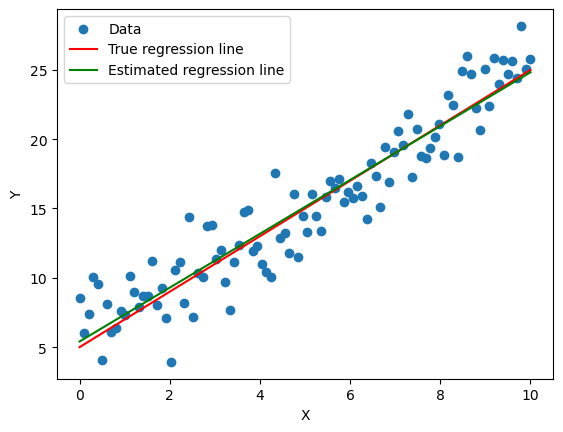

In [19]:

with pm.Model() as model:
    slope=pm.Normal('slope', mu=0, sd=10)
    intercept= pm.Normal('intercept',mu=0, sd=10)
    y_pred = slope * X + intercept
    likelihood = pm.Normal('y',mu=y_pred,sd=2.0,observed=y)
with model:
    map_estimate = pm.find_MAP()
    print('MAP estimate: ',map_estimate)
    
plt.scatter(X, y, label='Data')
plt.plot(X, true_slope * X + true_intercept, label='True regression line', color='red')
plt.plot(X, map_estimate['slope'] * X + map_estimate['intercept'], label='Estimated regression line', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

    

In [20]:
#-------------------------------------------
#   TVMARKETING DATASET REGRESSION MODEL 
#-------------------------------------------

In [3]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd



27
2


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


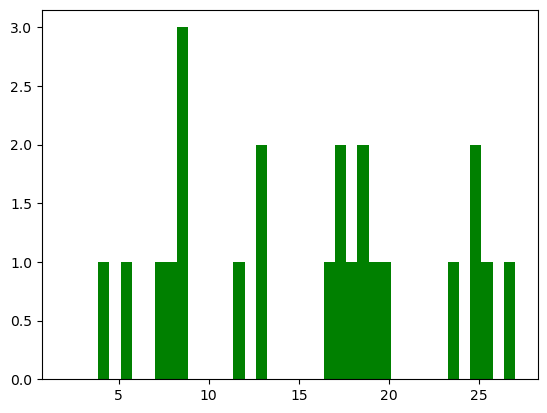

In [49]:
data=pd.read_csv("C:/Users/Talha/Downloads/tvmarketing.csv")
df=pd.read_table("C:/Users/Talha/Downloads/tvmarketing.csv", sep=',')
t= (data['Sales'].max())
t=round(t)
s= (data['Sales'].min())
s=round(s)
print(t)
print(s)


y_axis=data['TV'].values
range=(s,t)
bin=40
plt.hist(y_axis,bin,range,color='green')
df



#X=data['TV'].values
#y=data['Sales'].values

true_slope = 0.0464
true_intercept = 6.989
y_true = true_slope * X + true_intercept


MAP estimate:  {'slope': array(0.04756482), 'intercept': array(7.02704507)}


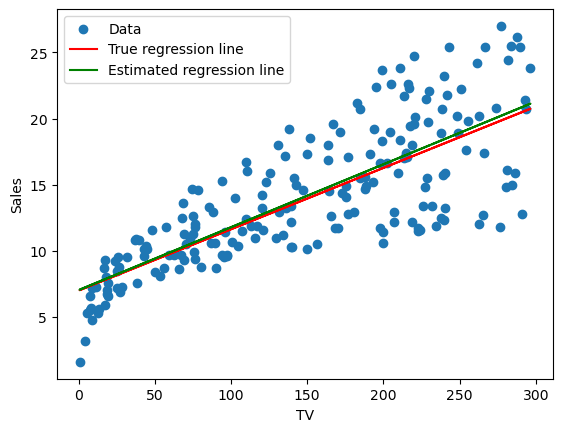

Slope: 0.047564816416289464
Intercept: 7.027045073093136


In [50]:
with pm.Model() as model:
    slope=pm.Normal('slope', mu=0, sd=10)
    intercept= pm.Normal('intercept',mu=0, sd=10)
    y_pred = slope * X + intercept
    likelihood = pm.Normal('y',mu=y_pred,sd=2.0,observed=y)
with model:
    map_estimate = pm.find_MAP()
    print('MAP estimate: ',map_estimate)

plt.scatter(X, y, label='Data')
plt.plot(X, y_true, label='True regression line', color='red')
plt.plot(X, map_estimate['slope'] * X + map_estimate['intercept'], label='Estimated regression line', color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()
print('Slope:', map_estimate['slope'])
print('Intercept:', map_estimate['intercept'])
    